# Lab 2  -  Blackbody spectra

In this lab you will explore the blackbody (continuous) spectra of two stars to determine their properties. Make sure to read the instructions carefully and answer any questions embedded within the notebook.

Astronomy skills:
- continuous / blackbody spectra
- Stefan-Boltzmann Law
- Wien's Law
- stellar properties

Python skills:
- reading in data files
- making plots
- finding maxima
- numerical integration

---

## Set up
1. If using Colab, upload the data files for this lab to the "files" folder on the left sidebar.

2. Run the cell below to read in the packages you'll need for this lab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Star 1

Let's look at the stars one at a time, starting with Star 1:


### Step 1 - read in data

The data file for Star 1 is called "Lab02_star1.csv". Open this file (in Colab or on your computer) and look at the data.

**Question:** What information are you given? What units do these values have?  (type your answers in the cell below)

In [ ]:
# write your answer here

# wavelength in nm and intensity in J/m2/s/nm




Read in the spectrum for Star 1 using the `np.loadtxt()` function.

In [ ]:
# Read the data into numpy arrays
w1, f1 = np.loadtxt('Lab02_star1.csv', delimiter=',', skiprows=1, unpack=True)

# print them out
print(w1[0:10])
print(f1[0:10])


[130. 135. 140. 145. 150. 155. 160. 165. 170. 175.]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001]


### Step 2 - plot spectrum

Next, make a plot of Star 1's blackbody spectrum. Make sure to include axis labels with units!



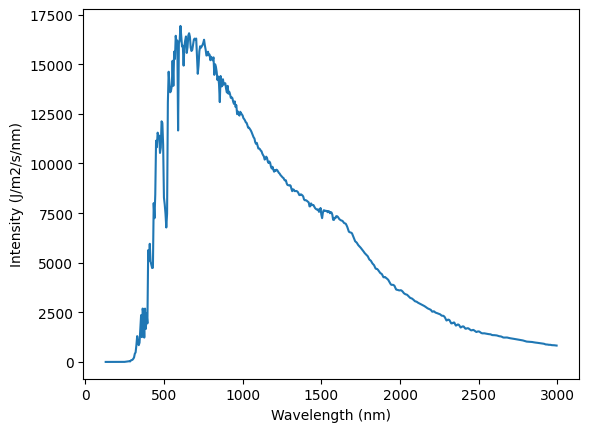

In [ ]:
# make plot here
plt.plot(w1, f1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (J/m2/s/nm)')
plt.show()



### Step 3 - temperature estimate

In order to estimate the temperature of Star 1 using Wien's Law, we need to know the peak wavelength. You could estimate the wavelength by eye (reading off the graph), but a better way to do this would be to use python to determine the maximum and it's location. One way to do this is to use the `np.max()` and `np.argmax()` functions -- `np.max(array)` returns the maximum value of an array, while `np.argmax(array)` returns the index (location) where the maximum occurs.

Run the cell below to see an example:



In [ ]:
# data array
a = [100, 200, 500]

# print max value
print(np.max(a))

# print index where it occurs
print(np.argmax(a))

500
2


This tells us that the maximum value is 500, which occurs in the third position in the array (index = 2).

\
Use this example to find the index where the peak intensity occurs and the corresponding wavelength, then calculate Star 1's temperature.

In [ ]:
# code here
index = np.argmax(f1)    # peak index
peak_w = w1[index]       # corresponding wavelength

temp1 = 2.9e-3 / (peak_w / 1e9)   #  needs w in m
print(temp1)

4793.388429752065


### Step 4 - total intensity

Our overall goal is to measure the luminosity of Star 1. Therefore, you need to know the total intensity (over all wavelengths) by calculating the area under the blackbody curve. This represents the total energy emitted per second per unit area on the star's surface.

\

To do this, you can use numerical integration -- a technique where you add up the areas of rectanges to approximate the integral of a function.  (a.k.a. a Riemann Sum).  In the example below, you could use the blue data points to create rectangles with the same height as the data point and the same width as the separation between the points. Then add up the rectangle areas to estimate the area under the curve.

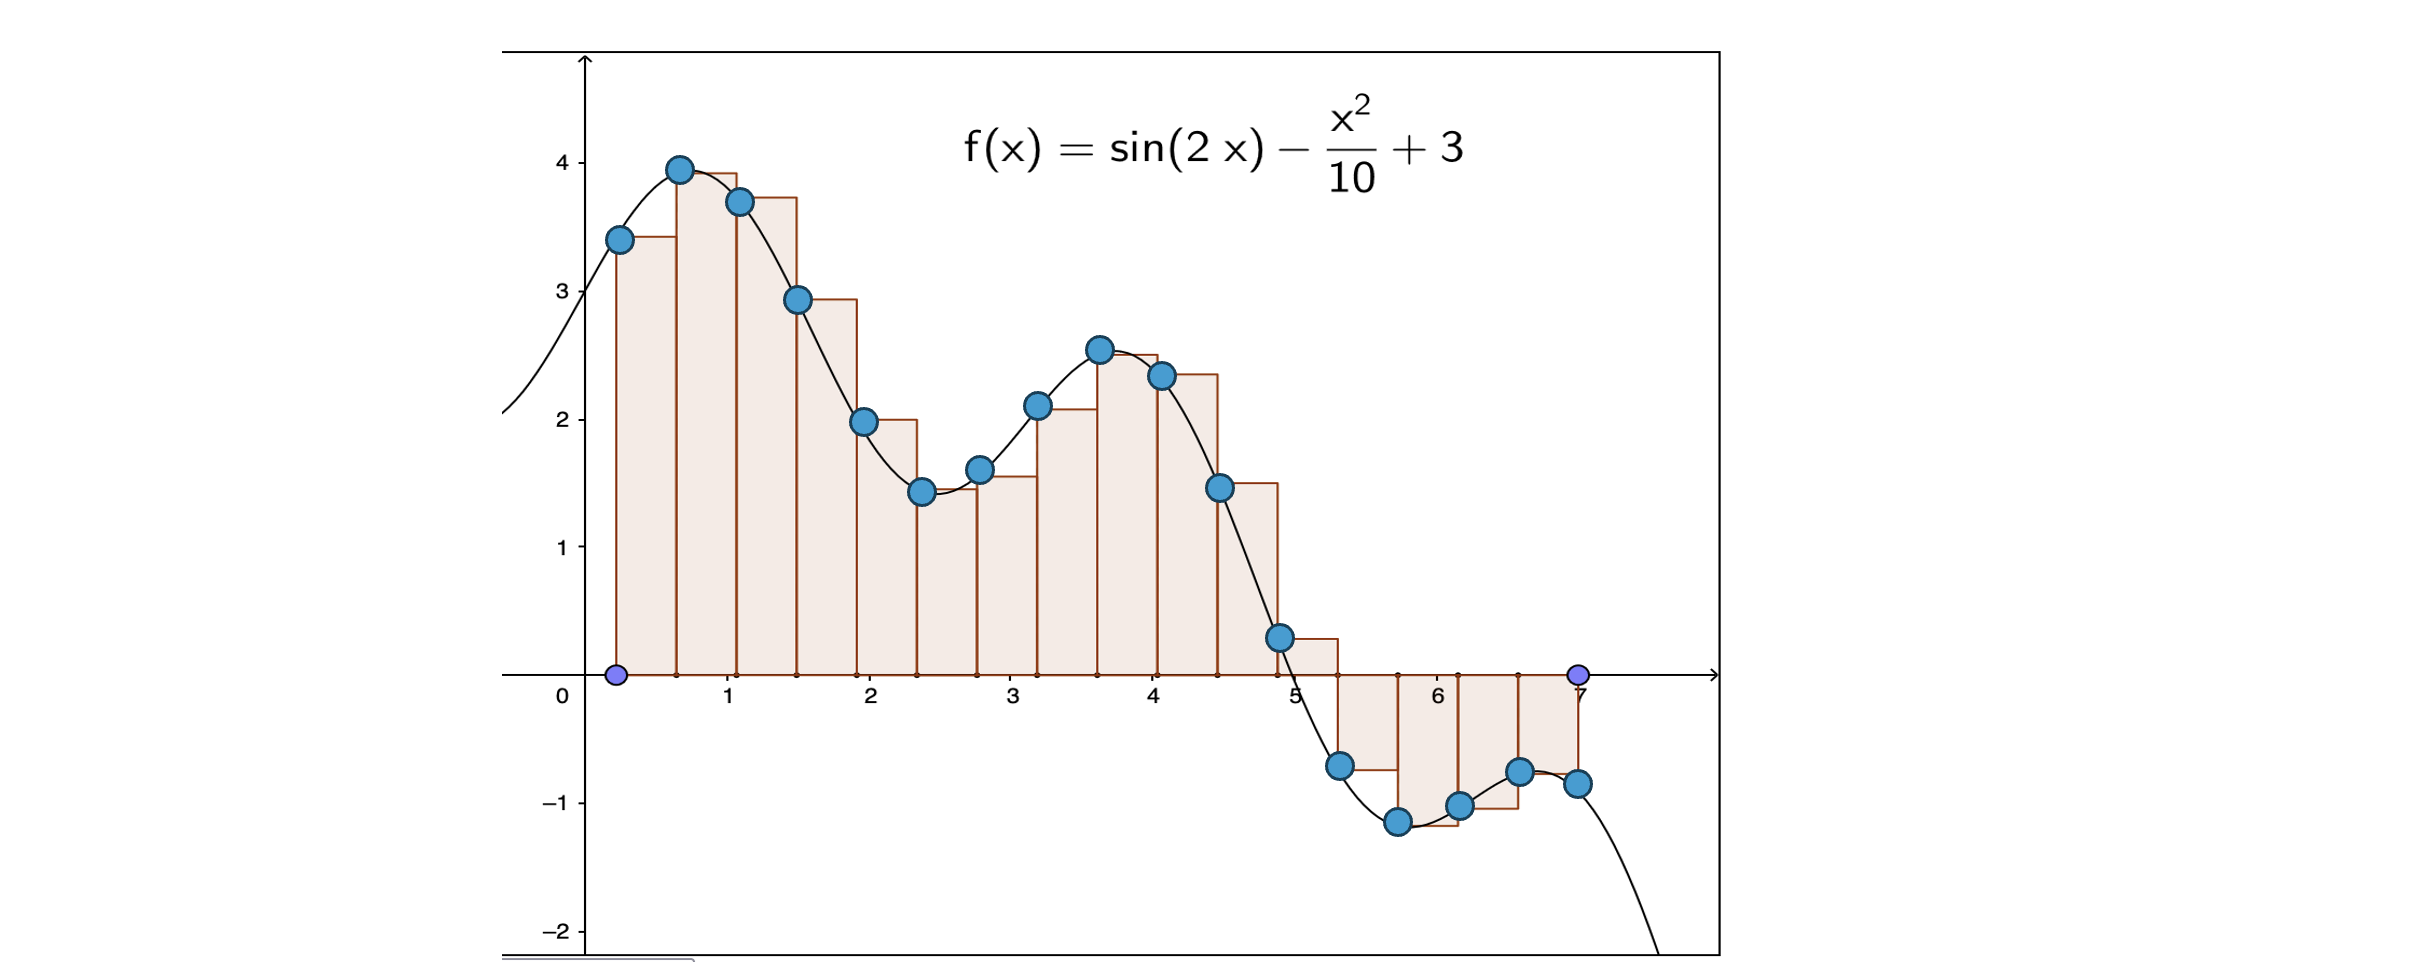

We are going to do the same thing for our blackbody curve:
1. Calculate the width of the rectangles
2. Create an array with the area of the rectangle corresponding to each data point
3. Add up all the rectangle areas. Hint: you can sum all the values in an array using `np.sum(array)`

In [ ]:
# write code here

# rectangle width = dw, height = f1 values
width = w1[1] - w1[0]
area = f1 * width


# J/m2/s/nm * nm = J/m2/s
intensity = np.sum(area)
print(intensity)
print('')


17629376.384999998



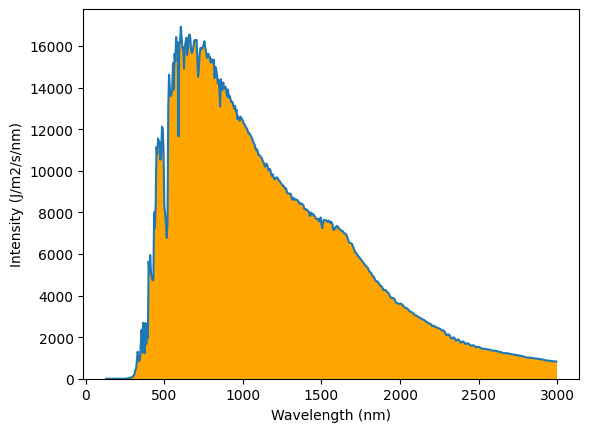

In [ ]:
plt.plot(w1, f1)
plt.bar(w1, f1, color='orange', width=width)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (J/m2/s/nm)')
plt.show()



### Step 5 - effective temperature

Another way to determine the temperature of Star 1 would be to calculate the effective temperature using the total intensity. Write some code below to calculate the effective temperature of Star 1:

In [ ]:
# code here

# Btot = sigma * T^4    -->  T = (Btot / sigma)^1/4
Teff1 = (intensity / 5.67e-8)**0.25
print(Teff1)

4199.1701520162715


**Questions**

1. Do your temperatures from Step 3 and 5 match?  (If they are more than 1000 K different, check in with a neighbor to see what could be going wrong!)

2. Why do you get a different answer, even though you're using the same dataset?

3. Which temperature measurement do you think is more reliable / accurate ? (Which would you publish?)

In [ ]:
# write your answers here

# 1.

# 2.

# 3.

### Step 6 - luminosity

Now we can calculate the luminosity of Star 1! If we know from other observations that this star has a radius of 0.7 R$_\odot$ (solar radii), calculate its luminosity in L$_\odot$ (solar luminosities).



In [ ]:
# write code here
# L = 4 pi R^2 sigma T^4
R_sun = 0.7   # Rsun
R_m = R_sun * 6.957e8 # convert to m
sigma = 5.67e-8  # stefanboltzmann constant

L = 4 * np.pi * R_m**2 * sigma * Teff1**4   # J/s
L_sun = L / 3.9e26  # Lsun
print(L_sun)


0.13471696610725453


**Question:** The Sun has a temperature of 5770 K and a luminosity of 1 L$_\odot$. How does the temperature and luminosity of Star 1 compare to the Sun?  Write your answer in the box below.

In [ ]:
# answer here
#



---



## Star 2

Repeat Steps 1 - 6 with Star 2's data to find its effective temperature and luminosity. Let's assume that Star 2 has a radius of 2.0 $R_\odot$. Make sure to convert your final answers from metric to solar units.

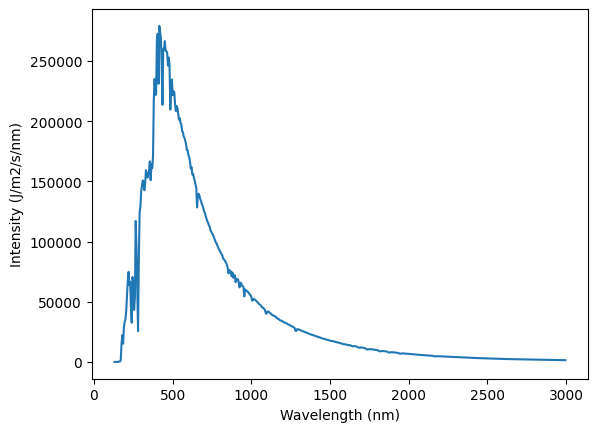

6987.951807228916
6972.450942733342
1.8672514567017315


In [ ]:
# code here

# Read the data into numpy arrays
w2, f2 = np.loadtxt('Lab02_star2.csv', delimiter=',', skiprows=1, unpack=True)

# make plot here
plt.plot(w2, f2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (J/m2/s/nm)')
plt.show()

# wiens law
index = np.argmax(f2)    # peak index
peak_w = w2[index]       # corresponding wavelength
temp2 = 2.9e-3 / (peak_w / 1e9)   #  needs w in m
print(temp2)


# rectangle width = dw, height = f1 values
width = w2[1] - w2[0]
area = f2 * width
# J/m2/s/nm * nm = J/m2/s
intensity = np.sum(area)


# Btot = sigma * T^4    -->  T = (Btot / sigma)^1/4
Teff2 = (intensity / 5.67e-8)**0.25
print(Teff2)

# write code here
# L = 4 pi R^2 sigma T^4
R_sun = 2.0   # Rsun
R_m = R_sun * 6.957e8 # convert to m
sigma = 5.67e-8  # stefanboltzmann constant

L = 4 * np.pi * R_m**2 * sigma * temp1**4   # J/s
L_sun = L / 3.9e26  # Lsun
print(L_sun)



**Question:** How does the temperature and luminosity of Star 2 compare to the Sun?  Write your answer in the box below.

In [ ]:
# answer here
#

---
## Bonus

If you have time left over, practice making your own blackbody curves! Calculate the intensity as a function of wavelength for the temperatures of Star 1 and Star 2. You can use the wavelengths from above or define your own wavelengths, your choice. Then, plot each blackbody curve on top of the real spectrum for that star.




$$B(\lambda, T) = \dfrac{2\pi hc^2}{\lambda^5} \dfrac{1}{e^{hc/\lambda kT} - 1}$$


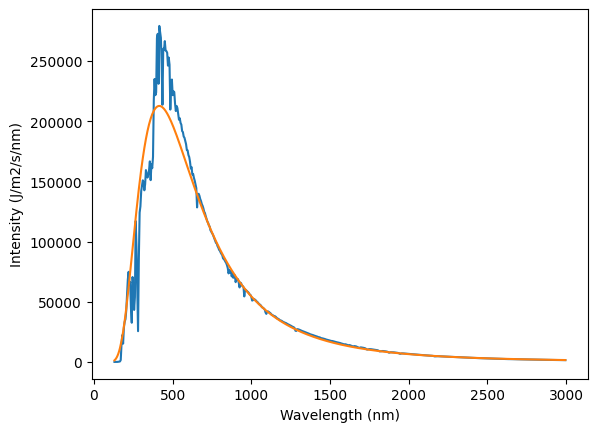

In [ ]:
# code here

# bb curve
pi = np.pi
h = 6.63 * 10**(-34)   # J s
c = 2.99 * 10**8       # m / s
k = 1.38 * 10**(-23)   # J / K

T = Teff2   # K
x_m = w2 * 1e-9   # m

y0 = (2 * pi * h * c**2) / (x_m**5) / (np.exp(h*c/(x_m * k * T)) - 1)   # J/m2/s/m = W/m3
y0 = y0 / 10**9   # per nm

# make plot here
plt.plot(w2, f2)
plt.plot(w2, y0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (J/m2/s/nm)')
plt.show()



---
## Final steps


**Question:** Imagine we were studying an object with a temperature of 100 K. Do you think we could accurcately measure its luminosity using a similar dataset and method as for Stars 1 and 2? Why or why not?

In [ ]:
# write your answer here
#
# An object with a temperature of 100 K would emit most of it's light
# at longer wavelengths, so we could not be able to see the peak in our data.
# we would need to take an IR or radio spectrum to measure it's luminosity.

**Turning in your lab:**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.

